### 1. Load Libraries and Data

In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Load Data
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
df.shape

(10000, 14)

In [26]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### 2. Statistical Tests

In [28]:
# Chi-Square Test for Categorical Features: To determine 
# if there is a significant association between categorical
# features (e.g., Gender, Geography) and the churn status.
from scipy.stats import chi2_contingency

# Cross-tabulation of Gender and Churn
contingency_table = pd.crosstab(df['Gender'], df['Exited'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square Test: p-value = {p}")

print('A low p-value (< 0.05) suggests that there is a significant relationship between gender and churn.')

Chi-square Test: p-value = 2.2482100097131755e-26
A low p-value (< 0.05) suggests that there is a significant relationship between gender and churn.


In [29]:
# Cross-tabulation of Geography and Churn
contingency_table = pd.crosstab(df['Geography'], df['Exited'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square Test: p-value = {p}")

print('A low p-value (< 0.05) suggests that there is a significant relationship between Geography and churn.')

Chi-square Test: p-value = 3.8303176053541544e-66
A low p-value (< 0.05) suggests that there is a significant relationship between Geography and churn.


In [30]:
# T-Test for Numerical Features: Use a t-test to compare the means of numerical 
# features like Credit Score, Age, and Balance between churned and non-churned customers.
from scipy.stats import ttest_ind

# Test between customers who churned and those who didn’t
churned = df[df['Exited'] == 1]
not_churned = df[df['Exited'] == 0]

# T-test for Credit Score
t_stat, p_value = ttest_ind(churned['CreditScore'], not_churned['CreditScore'])

print(f"T-Test for Credit Score: p-value = {p_value}")
print('A low p-value (< 0.05) indicates that there is a significant ')
print('difference in credit scores between churned and non-churned customers.')     

T-Test for Credit Score: p-value = 0.006738213892192373
A low p-value (< 0.05) indicates that there is a significant 
difference in credit scores between churned and non-churned customers.


In [31]:
# T-test for Age 
t_stat, p_value = ttest_ind(churned['Age'], not_churned['Age'])

print(f"T-Test for Credit Score: p-value = {p_value}")
print('A low p-value (< 0.05) indicates that there is a significant ')
print('difference in Age between churned and non-churned customers.')     

T-Test for Credit Score: p-value = 1.2399313093427738e-186
A low p-value (< 0.05) indicates that there is a significant 
difference in Age between churned and non-churned customers.


In [32]:
# T-test for Balance 
t_stat, p_value = ttest_ind(churned['Balance'], not_churned['Balance'])

print(f"T-Test for Credit Score: p-value = {p_value}")
print('A low p-value (< 0.05) indicates that there is a significant ')
print('difference in Balance between churned and non-churned customers.')     

T-Test for Credit Score: p-value = 1.2755633191525477e-32
A low p-value (< 0.05) indicates that there is a significant 
difference in Balance between churned and non-churned customers.


In [33]:
# Encode 'Exited' for clearer labeling (0=Stayed, 1=Churned)
df['Exited_new'] = df['Exited'].replace({0: 'Stayed', 1: 'Churned'})

In [34]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_new
498,499,15591995,Barry,757,Germany,Male,26,8,121581.56,2,1,1,127059.04,0,Stayed
330,331,15598493,Beach,656,France,Male,50,7,0.00,2,0,1,72143.44,0,Stayed
3448,3449,15610903,Chukwueloka,560,Spain,Female,31,5,125341.69,1,1,0,79547.39,0,Stayed
689,690,15720649,Ferdinand,641,France,Female,36,5,66392.64,1,1,0,31106.67,0,Stayed
2310,2311,15569222,Mendes,781,France,Male,32,6,147107.91,1,1,1,40066.95,0,Stayed


### 3. Exploratory Data Analysis (EDA)

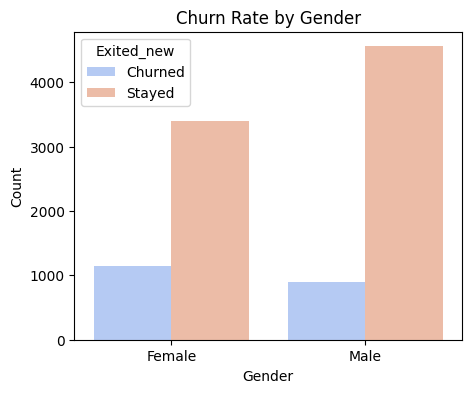

Exited_new  Churned  Stayed    All
Gender                            
Female         1139    3404   4543
Male            898    4559   5457
All            2037    7963  10000


In [35]:
# Create a bar chart showing churn rate by Gender
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='Exited_new', data=df, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

gender_crosstab = pd.crosstab(df['Gender'], df['Exited_new'], margins=True)
print(gender_crosstab)


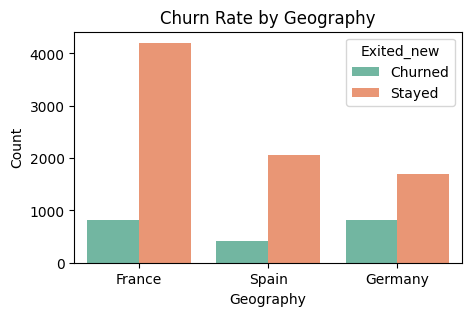

Exited_new  Churned  Stayed    All
Geography                         
France          810    4204   5014
Germany         814    1695   2509
Spain           413    2064   2477
All            2037    7963  10000


In [36]:
# Create a bar chart showing churn rate by Geography
plt.figure(figsize=(5,3))
sns.countplot(x='Geography', hue='Exited_new', data=df, palette='Set2')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

geography_crosstab = pd.crosstab(df['Geography'], df['Exited_new'], margins=True)
print(geography_crosstab)


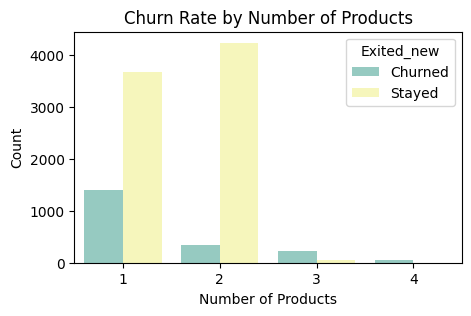

Exited_new     Churned  Stayed    All
NumOfProducts                        
1                 1409    3675   5084
2                  348    4242   4590
3                  220      46    266
4                   60       0     60
All               2037    7963  10000


In [37]:
# Create a bar chart showing churn rate by number of products held by the customer
plt.figure(figsize=(5,3))
sns.countplot(x='NumOfProducts', hue='Exited_new', data=df, palette='Set3')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

products_crosstab = pd.crosstab(df['NumOfProducts'], df['Exited_new'], margins=True)
print(products_crosstab)


C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


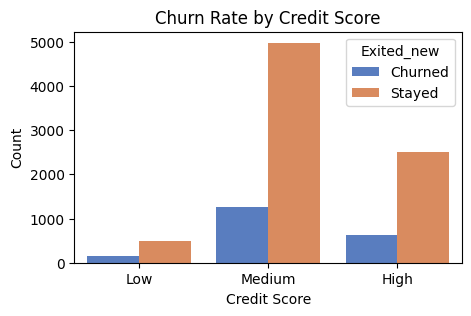

Exited_new       Churned  Stayed    All
CreditScore_Bin                        
Low                  152     491    643
Medium              1266    4975   6241
High                 619    2497   3116
All                 2037    7963  10000


In [38]:
# Create a new column for CreditScore bins
df['CreditScore_Bin'] = pd.cut(df['CreditScore'], bins=[300,500,700,900], labels=['Low', 'Medium', 'High'])

# Create a bar chart showing churn rate by Credit Score bins
plt.figure(figsize=(5,3))
sns.countplot(x='CreditScore_Bin', hue='Exited_new', data=df, palette='muted')
plt.title('Churn Rate by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

credit_crosstab = pd.crosstab(df['CreditScore_Bin'], df['Exited_new'], margins=True)
print(credit_crosstab)

In [39]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [40]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_new,CreditScore_Bin
1210,711,France,Male,51,7,0.00,3,1,0,38409.79,1,Churned,High
294,681,France,Male,38,3,0.00,2,1,1,112491.96,0,Stayed,Medium
5095,705,Spain,Female,46,5,89364.91,1,0,1,139162.15,0,Stayed,High


### 4. Feature Engineering

In [41]:
# Encode categorical variables
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])  # Male: 1, Female: 0

In [42]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [43]:
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_new,CreditScore_Bin,Geography_Germany,Geography_Spain
337,649,1,33,2,0.00,2,1,0,2010.98,0,Stayed,Medium,False,False
673,640,0,32,6,118879.35,2,1,1,19131.71,0,Stayed,Medium,False,True
5797,699,1,37,10,0.00,2,0,0,83263.04,0,Stayed,Medium,False,False


In [44]:
# Check Feature Importance
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
            'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']

# Define target and feature variables
x = df[features]
y = df['Exited']

### 5. Data Splitting and Scaling

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### 6. Handle Data Imbalance

In [46]:
# Apply SMOTE to balance the data
sm = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)

# Check the class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_balanced).value_counts())


Before SMOTE: Exited
0    6370
1    1630
Name: count, dtype: int64
After SMOTE: Exited
1    6370
0    6370
Name: count, dtype: int64


### 7. Model Training and Evaluation

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(x_train_balanced, y_train_balanced)

# Predict and Evaluate
y_pred_logreg = logreg.predict(x_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1]))

Logistic Regression Results:
[[1147  446]
 [ 123  284]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000

Accuracy: 0.7155
ROC-AUC: 0.7768754887398955


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_balanced, y_train_balanced)

# Predict and Evaluate
y_pred_knn = knn.predict(x_test)

print("KNN Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Results:
[[1185  408]
 [ 143  264]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1593
           1       0.39      0.65      0.49       407

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.75      2000

Accuracy: 0.7245


In [49]:
from sklearn.svm import SVC

svc = SVC(probability=True, class_weight='balanced')
svc.fit(x_train_balanced, y_train_balanced)

# Predict and Evaluate
y_pred_svc = svc.predict(x_test)

print("SVM Results:")
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("ROC-AUC:", roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1]))

SVM Results:
[[1293  300]
 [ 113  294]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.83      0.79      0.81      2000

Accuracy: 0.7935
ROC-AUC: 0.8387694319897709


In [50]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(x_train_balanced, y_train_balanced)

# Predict and Evaluate
y_pred_rf = rf_model.predict(x_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))

Random Forest Results:
[[1436  157]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy: 0.842
ROC-AUC: 0.8473072456123303


### Choosing the Right Model Based on Your Goal

- **Goal: Balance Precision and Resources**  
  If your primary objective is to strike a balance between correctly identifying churners and minimizing the resources wasted on false positives, the **Random Forest model** would be a more suitable choice.

- **Goal: Maximizing Recall**  
  If your priority is to catch as many potential churners as possible, even if it results in a higher number of false positives, you should opt for the model with the highest **recall**. In this case, it would be the **SVM model**.


### 8. Feature Importance

C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


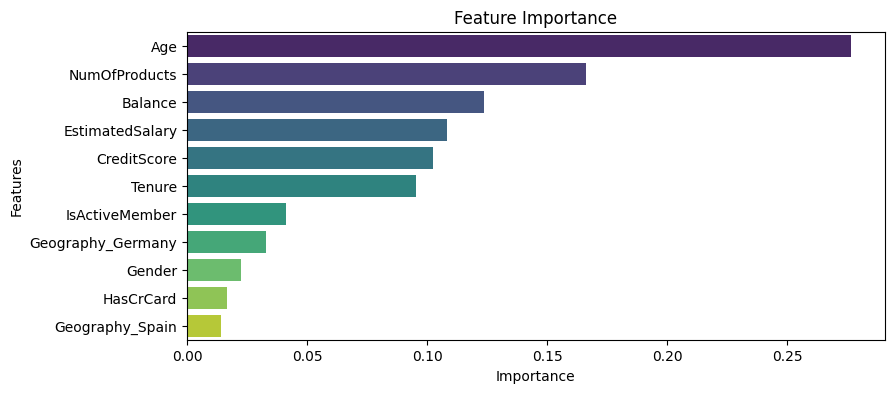

In [51]:
# Feature Importance Visualization
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(9, 4))
sns.barplot(x=importance[indices], y=[features[i] for i in indices], palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### 9. Hyperparameter Tuning (Optuna)

In [52]:
!pip install optuna

In [64]:
# Hyperparameter tuning using optuna for Random Forest model with 5 hyperparameters

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import optuna

# Define the objective function
def objective(trial):
    # Suggest values for the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Create the RandomForestClassifier with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Perform 5-fold cross-validation and calculate accuracy
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()

    return score  # Return the accuracy score for Optuna to maximize

In [66]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials to find the best hyperparameters

[I 2024-12-10 13:57:57,513] A new study created in memory with name: no-name-a8ca3d2d-372a-4666-95be-e08c7264c97f
[I 2024-12-10 13:58:02,046] Trial 0 finished with value: 0.8623749999999999 and parameters: {'n_estimators': 153, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8623749999999999.
[I 2024-12-10 13:58:10,165] Trial 1 finished with value: 0.8641249999999999 and parameters: {'n_estimators': 232, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8641249999999999.
[I 2024-12-10 13:58:14,584] Trial 2 finished with value: 0.8231249999999999 and parameters: {'n_estimators': 290, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8641249999999999.
[I 2024-12-10 13:58:20,804] Trial 3 finished with value: 0.8627500000000001 and parameters: {'n_estimators': 209, 'max_depth': 10, 'mi

In [67]:
# Print the best result
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.865
Best hyperparameters: {'n_estimators': 240, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}


In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Train a RandomForestClassifier using the best hyperparameters from Optuna
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)

# Fit the model to the training data
best_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

# Calculate the ROC AUC score
y_pred_proba = best_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC after tuning: {roc_auc:.2f}')

Test Accuracy with best hyperparameters: 0.87
ROC AUC after tuning: 0.86


In [69]:
# For visualizations
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate
from optuna.visualization import plot_slice, plot_contour, plot_param_importances

In [70]:
# Hyperparameter Importance
plot_param_importances(study).show()

# Hyperparameter Tuning Results: Random Forest Model

After performing hyperparameter tuning using **Optuna**, here are the results for the Random Forest model:

### Best Trial Results
- **Best Accuracy:** 0.865
- **Best Hyperparameters:**
  - `n_estimators`: 240
  - `max_depth`: 17
  - `min_samples_split`: 7
  - `min_samples_leaf`: 3
  - `max_features`: 'log2'

### Performance with Best Hyperparameters
- **Test Accuracy:** 0.87
- **ROC AUC Score:** 0.86

### Conclusion
The Random Forest model, with the optimal hyperparameters determined by Optuna, achieves a high level of accuracy and a strong ROC AUC score. This indicates that the model is both precise and effective at distinguishing between churners and non-churners.

The tuned Random Forest model offers a balanced performance, making it a suitable choice for the **customer churn prediction task**.
